In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
file = open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('ERROR at line number: ', i)

ERROR at line number:  281873
ERROR at line number:  281874
ERROR at line number:  281875


In [4]:
data = pd.DataFrame(data = processedList, columns = ['user', 'activity', 'time', 'x', 'y', 'z'])
data

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164
...,...,...,...,...,...,...
343411,11,Walking,1786872234000,0.31,10.73,0.040861044
343412,11,Walking,1786922282000,2.76,10.95,0.84446156
343413,11,Walking,1786972392000,0.8,10.15,1.334794
343414,11,Walking,1787022227000,-1.57,8.69,1.4165162


In [5]:
data.describe()

,user,activity,time,x,y,z
count,343416,343416,343416,343416,343416,343416
unique,13,6,303353,1755,1800,995
top,20,Walking,0,0,0,0.0
freq,35599,137375,12826,13880,13052,12823


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [7]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [8]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [9]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')
data.describe()

,x,y,z
count,343416.000000,343416.000000,343416.000000
mean,1.007548,8.062965,0.306067
std,6.592155,6.624386,4.455004
min,-19.610000,-19.610000,-19.613300
25%,-2.301839,3.990000,-2.179256
50%,0.230000,8.660000,0.000000
75%,4.020000,12.530000,2.492524
max,19.570000,19.572440,19.231932


In [10]:
Fs = 20
activities = data.activity.value_counts().index

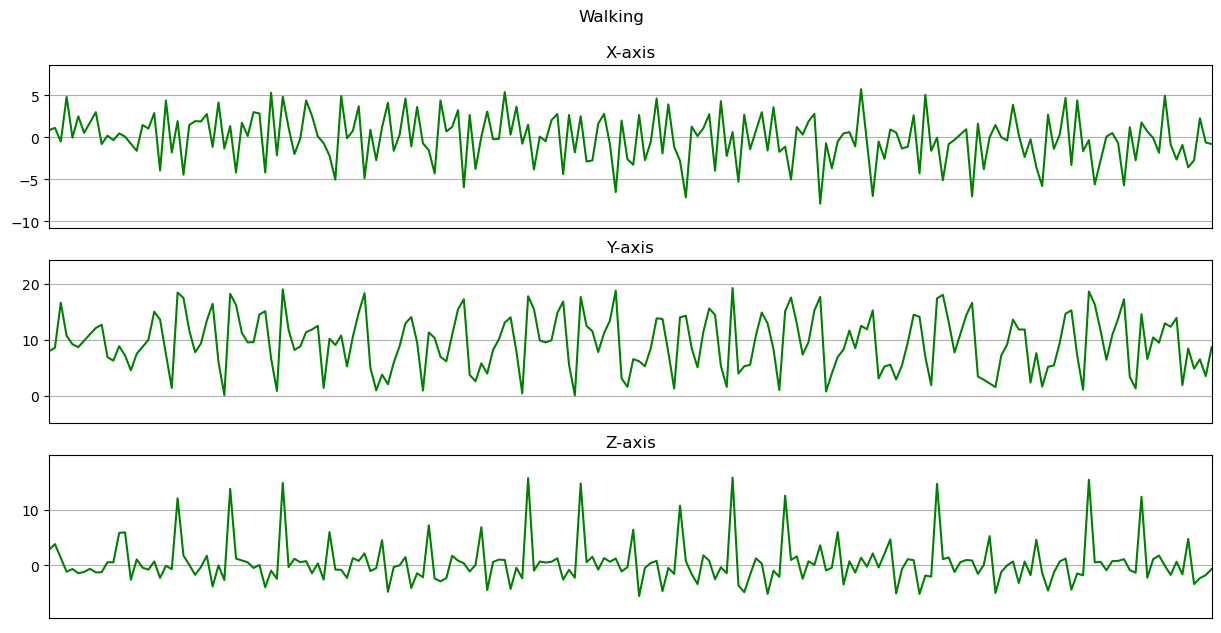

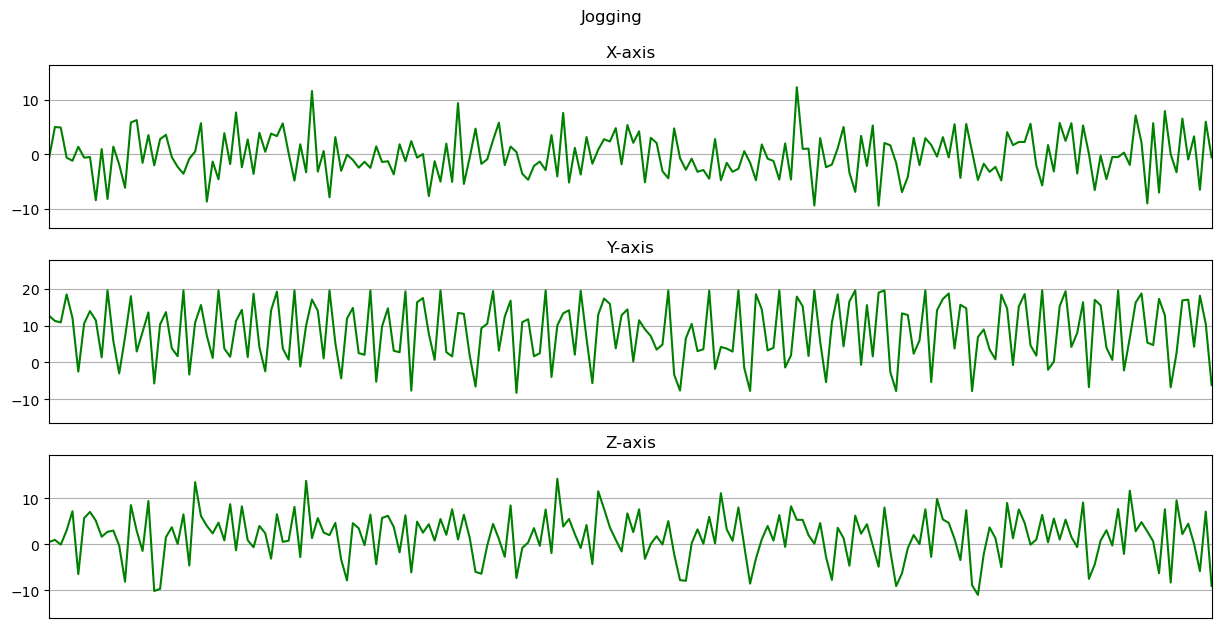

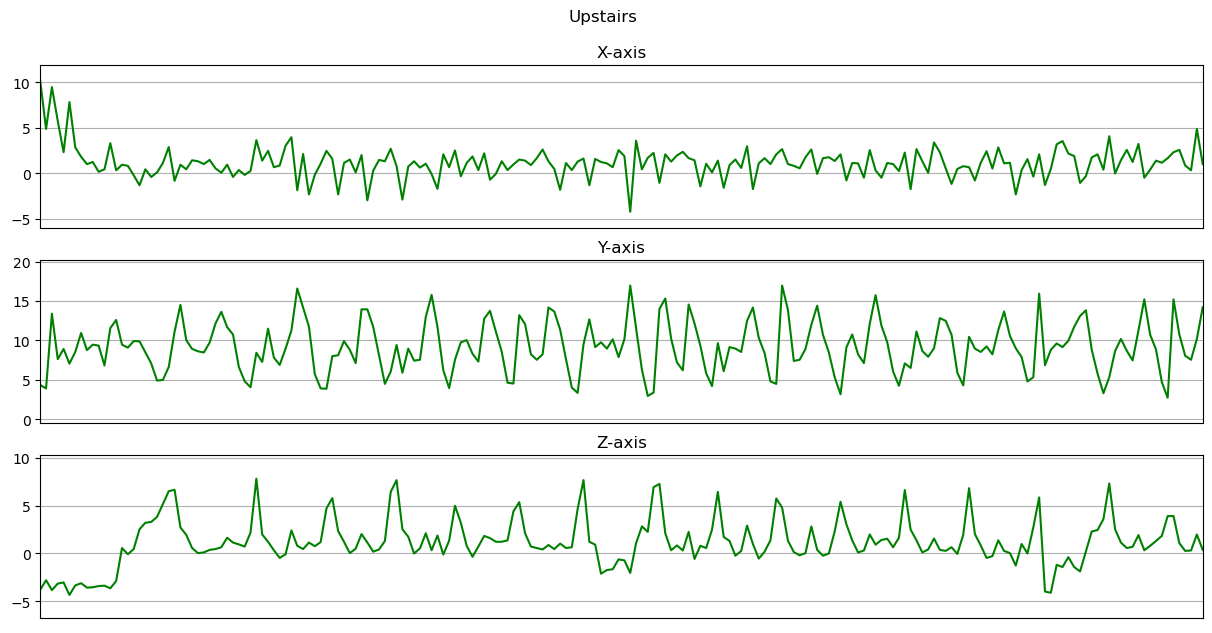

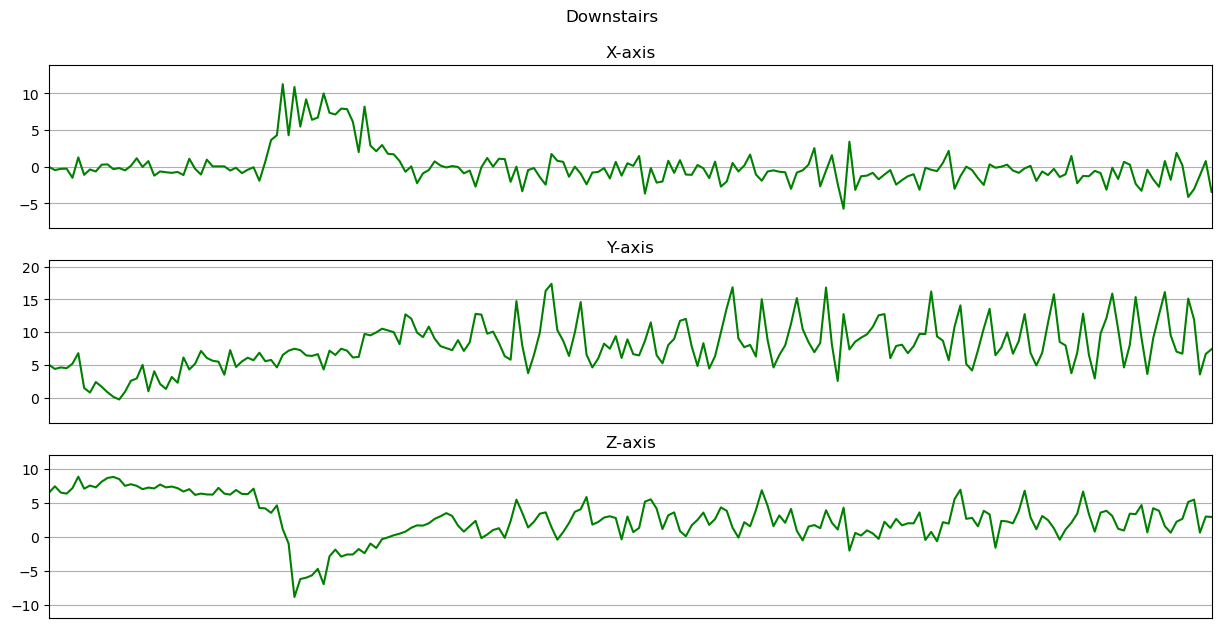

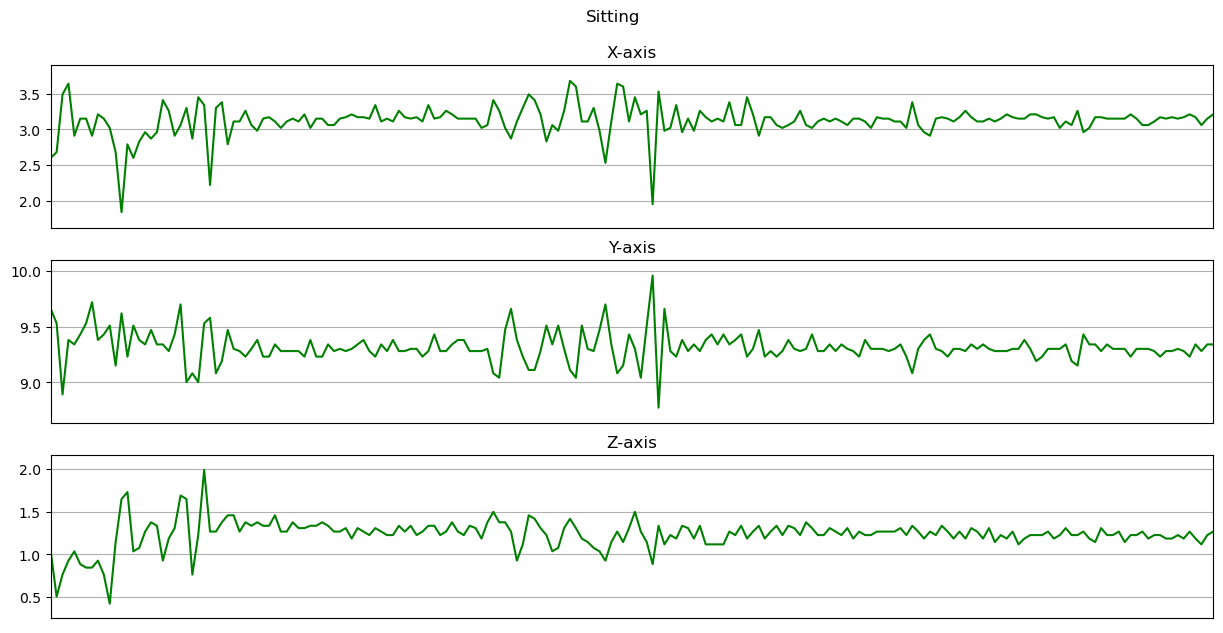

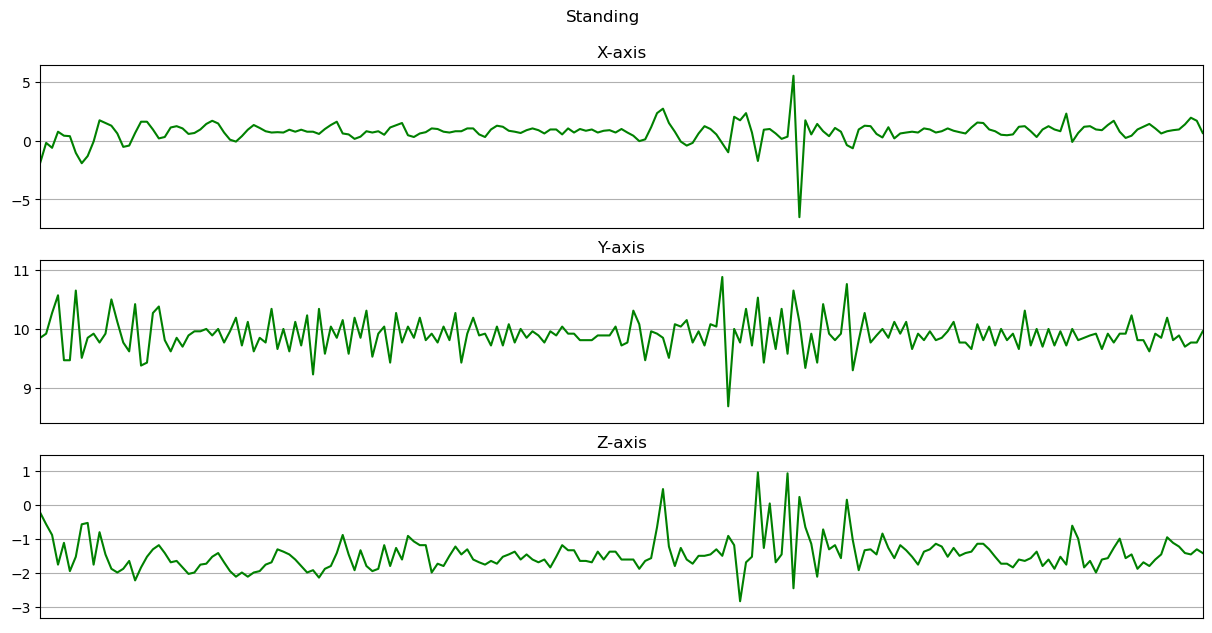

In [11]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 7), sharex = True)
    plot_axis(ax0, data.time, data.x, 'X-axis')
    plot_axis(ax1, data.time, data.y, 'Y-axis')
    plot_axis(ax2, data.time, data.z, 'Z-axis')
    plt.subplots_adjust(hspace = 0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top = 0.9)
    plt.shmoow()

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [12]:
df = data.drop(columns = ['user', 'time']).copy()
df

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
343411,Walking,0.310000,10.730000,0.040861
343412,Walking,2.760000,10.950000,0.844462
343413,Walking,0.800000,10.150000,1.334794
343414,Walking,-1.570000,8.690000,1.416516


In [13]:
df.activity.value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [14]:
Walking = df[df['activity'] == 'Walking'].head(3555).copy()
Jogging = df[df['activity'] == 'Jogging'].head(3555).copy()
Upstairs = df[df['activity'] == 'Upstairs'].head(3555).copy()
Downstairs = df[df['activity'] == 'Downstairs'].head(3555).copy()
Sitting = df[df['activity'] == 'Sitting'].head(3555).copy()
Standing = df[df['activity'] == 'Standing'].head(3555).copy()

In [15]:
print(len(Walking))
print(len(Jogging))
print(len(Upstairs))
print(len(Downstairs))
print(len(Sitting))
print(len(Standing))

3555
3555
3555
3555
3555
3555


In [16]:
balanced_data = pd.DataFrame()
balanced_data = pd.concat([balanced_data, Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [17]:
balanced_data.describe()

,x,y,z
count,21330.000000,21330.000000,21330.000000
mean,0.842585,8.517187,1.655158
std,3.727271,5.125860,3.364686
min,-14.246883,-13.443283,-14.982383
25%,-1.120000,6.510526,-0.531194
50%,0.653777,9.340000,1.225831
75%,3.170000,10.651112,2.955615
max,18.727978,19.572440,17.924377


In [18]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5
...,...,...,...,...,...
257318,Standing,-0.910000,9.430000,2.533385,3
257319,Standing,-1.180000,9.510000,2.492524,3
257320,Standing,-1.500000,9.530000,2.533385,3
257321,Standing,-2.070000,8.770000,2.179256,3


In [19]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [20]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data.label
X

,x,y,z
597,0.844462,8.008764,2.792171
598,1.116869,8.621680,3.786457
599,-0.503953,16.657684,1.307553
600,4.794363,10.760075,-1.184970
601,-0.040861,9.234595,-0.694638
...,...,...,...
257318,-0.910000,9.430000,2.533385
257319,-1.180000,9.510000,2.492524
257320,-1.500000,9.530000,2.533385
257321,-2.070000,8.770000,2.179256


In [21]:
y

597       5
598       5
599       5
600       5
601       5
         ..
257318    3
257319    3
257320    3
257321    3
257322    3
Name: label, Length: 21330, dtype: int64

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values
scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


In [23]:
import scipy.stats as stats
frame_size = Fs*4
hop_size = Fs*2

In [24]:
def get_frames(df, frame_size, hop_size):
    N_features = 3
    frames = []
    labels = []
    
    for i in range(0, len(df) - frame_size, hop_size):
        x = df.x.values[i : i + frame_size]
        y = df.y.values[i : i + frame_size]
        z = df.z.values[i : i + frame_size]
        frames.append([x,y,z])
        
        label = stats.mode(df.label[i : i + frame_size])[0][0]
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_features)
    labels = np.asarray(labels)
    return frames, labels

In [25]:
X, y = get_frames(scaled_X, frame_size, hop_size)
X.shape, y.shape

/var/folders/k2/y2zltzyj377bpb0r2vhy_j740000gn/T/ipykernel_14586/1269276763.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df.label[i : i + frame_size])[0][0]


((532, 80, 3), (532,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [27]:
X_train = X_train.reshape(425,80,3,1)
X_test = X_test.reshape(107,80,3,1)
X_train.shape, X_test.shape

((425, 80, 3, 1), (107, 80, 3, 1))

In [28]:
model = Sequential()

model.add(Conv2D(16, (2,2), activation='relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))
model.add(Conv2D(32, (2,2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

Metal device set to: Apple M1 Pro


2022-10-25 21:33:54.063346: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 21:33:54.063441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/10


2022-10-25 21:33:54.185345: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-25 21:33:54.349979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 21ms/step - loss: 1.6969 - accuracy: 0.2071 - val_loss: 1.4776 - val_accuracy: 0.3458
Epoch 2/10
14/14 [==============================] - 0s 9ms/step - loss: 1.3789 - accuracy: 0.4306 - val_loss: 1.1742 - val_accuracy: 0.7383
Epoch 3/10
 1/14 [=>............................] - ETA: 0s - loss: 0.9314 - accuracy: 0.7500

2022-10-25 21:33:54.709578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 9ms/step - loss: 1.0715 - accuracy: 0.6447 - val_loss: 0.8251 - val_accuracy: 0.8411
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: 0.8184 - accuracy: 0.7106 - val_loss: 0.6714 - val_accuracy: 0.8318
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.6228 - accuracy: 0.7835 - val_loss: 0.4658 - val_accuracy: 0.8598
Epoch 6/10
14/14 [==============================] - 0s 9ms/step - loss: 0.4704 - accuracy: 0.8400 - val_loss: 0.3973 - val_accuracy: 0.8131
Epoch 7/10
14/14 [==============================] - 0s 9ms/step - loss: 0.3979 - accuracy: 0.8612 - val_loss: 0.3144 - val_accuracy: 0.8692
Epoch 8/10
14/14 [==============================] - 0s 9ms/step - loss: 0.3228 - accuracy: 0.9059 - val_loss: 0.2843 - val_accuracy: 0.8879
Epoch 9/10
14/14 [==============================] - 0s 9ms/step - loss: 0.2315 - accuracy: 0.9294 - val_loss: 0.3207 - val_accuracy: 0.8598
Epoch 10/10
14/14 [============

In [31]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()

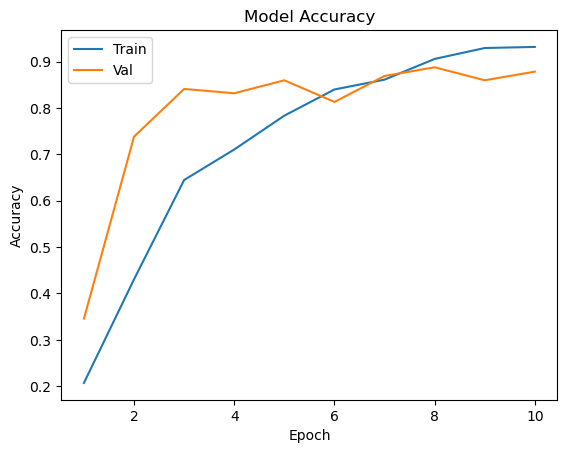

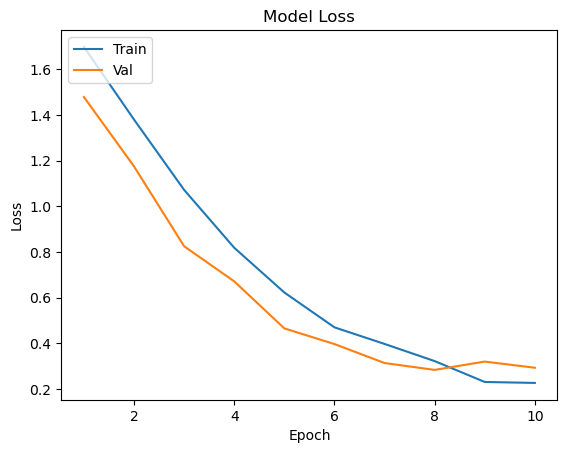

In [32]:
plot_learningCurve(history, 10)